### M Kevin Alrahmanto

## TEACHER: Mike X Cohen, sincxpress.com

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

# 1. Multivar Distance Outliers

In [3]:
data1=np.random.randn(20)*10
data2=np.random.randint(1,20,(20))

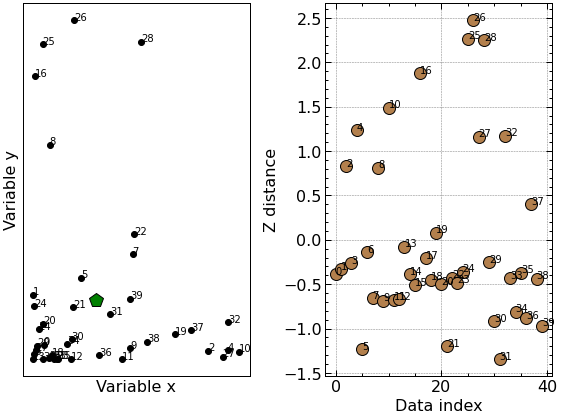

In [4]:
N = 40

# two-dimensional data
d1 = np.exp(-abs(np.random.randn(N)*3))
d2 = np.exp(-abs(np.random.randn(N)*5))
datamean = [ np.mean(d1), np.mean(d2) ]


# compute distance of each point to the mean
ds = np.zeros(N)
for i in range(N):
    ds[i] = np.sqrt( (d1[i]-datamean[0])**2 + (d2[i]-datamean[1])**2 ) #sqrt((x2-x1)^2)+(y2-y1)^2)
    

# convert to z (don't need the original data)
ds = (ds-np.mean(ds)) / np.std(ds)


# plot the data
fig,ax = plt.subplots(1,2,figsize=(8,6))

ax[0].plot(d1,d2,'ko',markerfacecolor='k')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('Variable x')
ax[0].set_ylabel('Variable y')

# plot the multivariate mean
ax[0].plot(datamean[0],datamean[1],'kp',markerfacecolor='g',markersize=15)

for i in range(N):
    ax[0].text(d1[i], d2[i], str(i))

# then plot those distances
ax[1].plot(ds,'ko',markerfacecolor=[.7, .5, .3],markersize=12)
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')

for i in range(N):
    ax[1].text(np.argwhere(ds)[i], ds[i], str(i))

plt.tight_layout()
plt.show()

In [5]:
datamean

[0.2695493495751283, 0.16825789969153157]

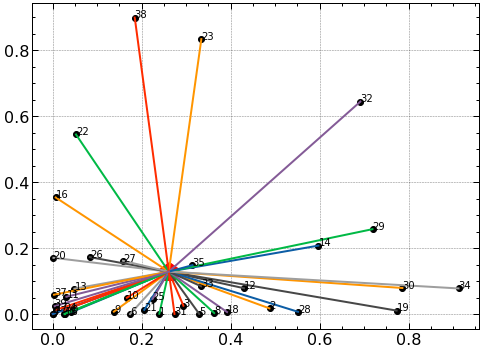

In [6]:
d1 = np.exp(-abs(np.random.randn(N)*3))
d2 = np.exp(-abs(np.random.randn(N)*5))
plt.plot(d1,d2, 'ko')
plt.plot(np.mean(d1), np.mean(d2), 'rp', markersize=20)
for i in range(N):
    plt.plot([d1[i],np.mean(d1)],[d2[i], np.mean(d2)])
    plt.text(d1[i], d2[i], str(i))

# 2. Norm Outliers Trimming

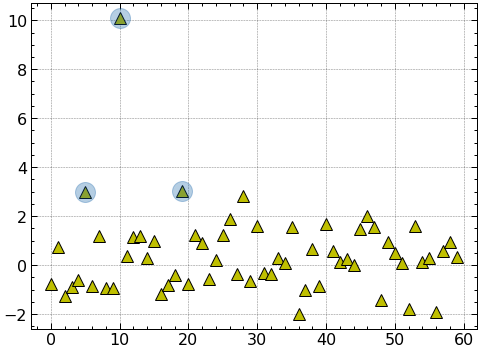

In [7]:
N=60
data=np.random.randn(N)*1.2
data[data<-2]=data[data<-2]**2
data[data>2]=data[data>2]**1.5
plt.plot(data, 'k^', markerfacecolor='y', markersize=12)
plt.plot(np.argsort(data)[-3:],data[np.argsort(data)[-3:]], 'o', markersize=20, alpha=0.3)

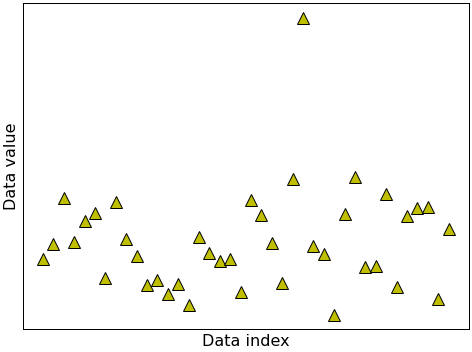

In [8]:
## create some data

N = 40
data = np.random.randn(N)
data[data<-2] = -data[data<-2]**2
data[data>2]  =  data[data>2]**2

# also need the mean-centered data
dataMC = data - np.mean(data)

# and plot them (not it ;) )
fig,ax = plt.subplots(1,1)
ax.plot(data,'k^',markerfacecolor='y',markersize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Data index')
ax.set_ylabel('Data value')
plt.show()

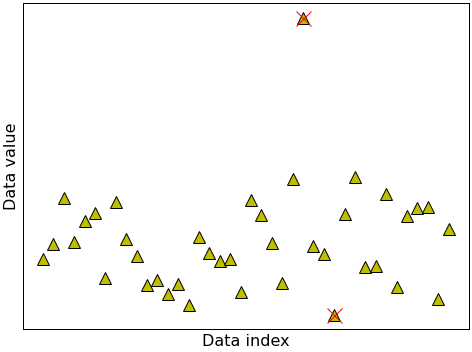

In [9]:
## option 1: remove k% of the data

# percent of "extreme" data values to remove
trimPct = 5 # in percent

# identify the cut-off (note the abs() )
datacutoff = np.percentile(abs(dataMC),100-trimPct)

# find the exceedance data values
data2cut = np.where( abs(dataMC)>datacutoff )[0]

# and mark those off
ax.plot(data2cut,data[data2cut],'rx',markersize=15)

fig

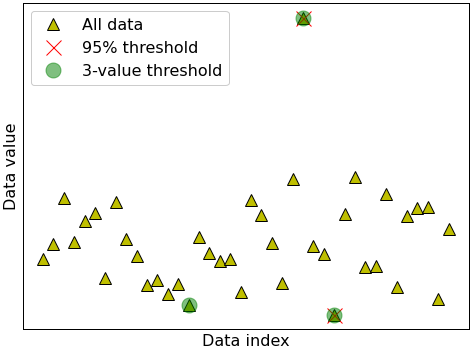

In [10]:
## option 2: remove k most extreme values

# number of "extreme" data values to remove
k2remove = 3  # in number

# find the exceedance data values
datasortIdx = np.argsort(abs(dataMC),axis=0)[::-1]
data2cut = np.squeeze(datasortIdx[:k2remove])

# and mark those off
ax.plot(data2cut,data[data2cut],'go',markersize=15,alpha=.5)

# finally, add a legend
ax.legend(('All data','%g%% threshold'%(100-trimPct),'%g-value threshold'%k2remove))
fig

# 3. Norm Outliers Z Method

In [11]:
from statsmodels import robust

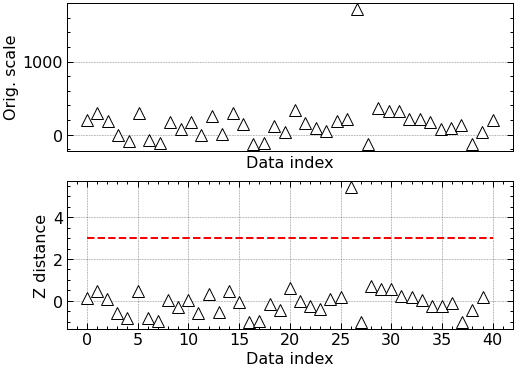

In [12]:
## create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2; # try to force a few outliers
data = data*200 + 50  # change the scale for comparison with z

# convert to z
dataZ = (data-np.mean(data)) / np.std(data)


#### specify the z-score threshold
zscorethresh = 3



# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

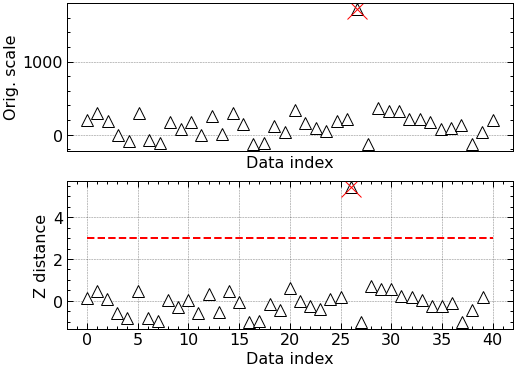

In [13]:
## identify outliers

# find 'em!
outliers = np.where(abs(dataZ)>zscorethresh)[0]

# and cross those out
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig

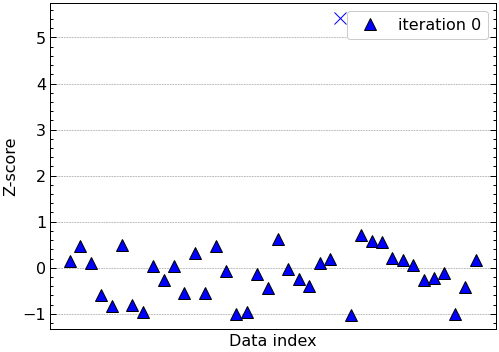

[26]


In [14]:
## iterative method

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data)) / np.std(data)


colorz = 'brkm'
numiters = 0 # iteration counter
while True:
    
    # convert to z
    datamean = np.nanmean(dataZ)
    datastd  = np.nanstd(dataZ)
    dataZ = (dataZ-datamean) / datastd
    
    # find data values to remove
    toremove = dataZ>zscorethresh
    
    # break out of while loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan
    
    # replot
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

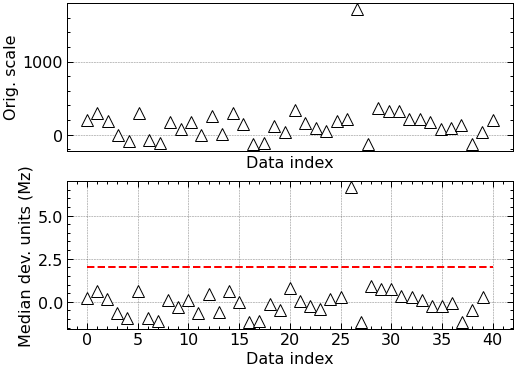

In [15]:
## modified Z for non-normal distributions

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed) / dataMAD


# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (Mz)')
plt.show()


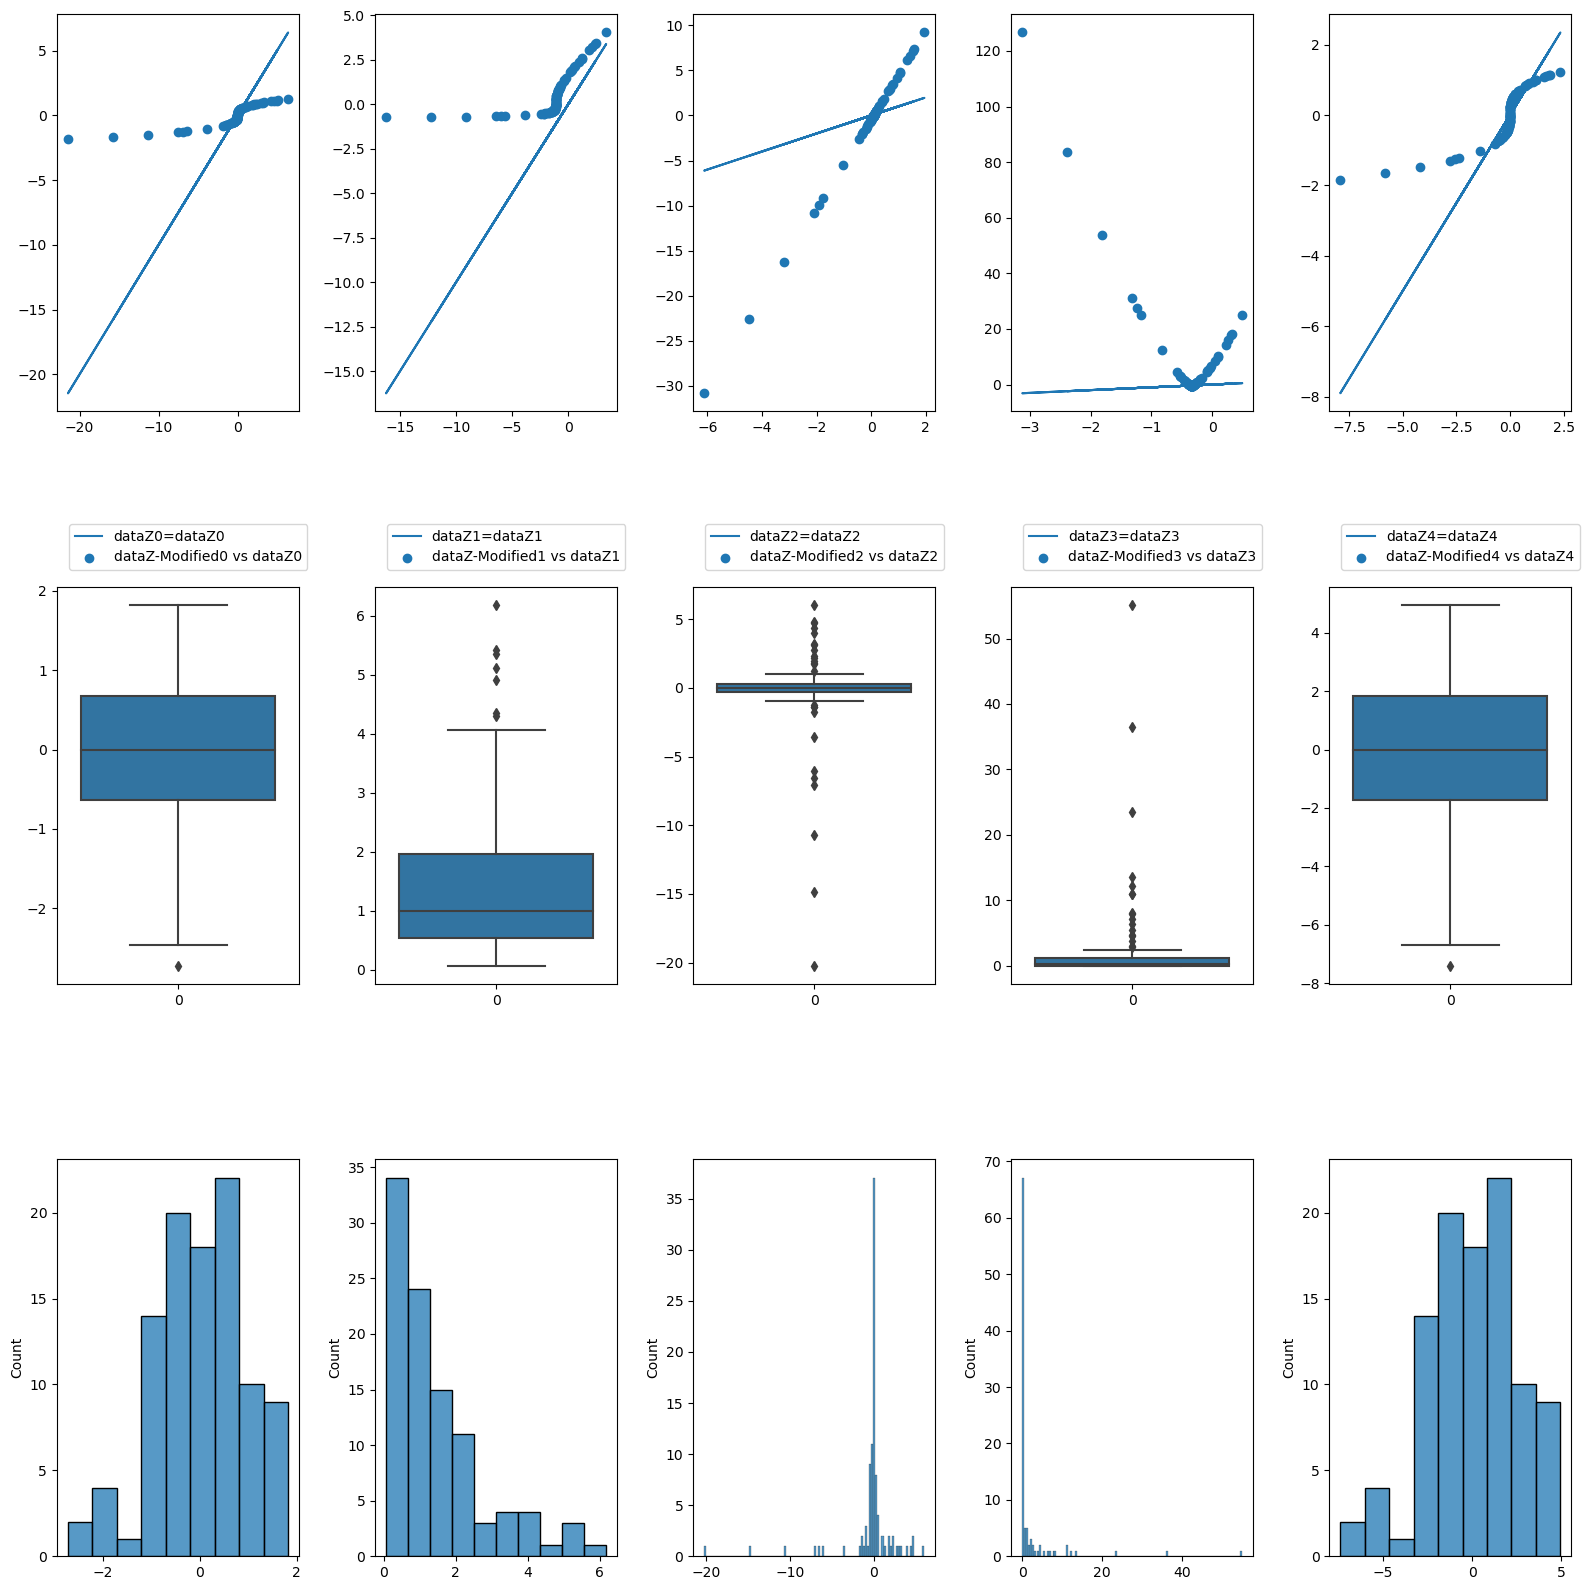

In [16]:
plt.style.use(['default'])
data0=np.random.randn(100)
data1=np.exp(data0)
data2=data0**3
data3=data0**4
data4=data0*(np.e)
data=[data0,data1, data2,data3, data4]
fig, ax=plt.subplots(3,len(data), figsize=(16,16))
for i in range(len(data)):
    dataZ = (data2-np.mean(data[i])) / np.std(data[i])
    dataMed = np.median(data[i])
    dataMAD = robust.mad(data[i])
    dataMz = stats.norm.ppf(.75)*(data[i]-dataMed) / dataMAD
    
    ax[0][i].plot(dataZ, dataZ, label='dataZ{0}=dataZ{0}'.format(i))
    ax[0][i].scatter(dataZ, dataMz, label='dataZ-Modified{0} vs dataZ{0}'.format(i))
    ax[0][i].legend(loc=(0.05, -0.4))
    plt.tight_layout()
    
    sns.boxplot(data=data[i], orient='v', ax=ax[1][i])
    plt.tight_layout()
    
    sns.histplot(data[i], ax=ax[2][i])
    plt.tight_layout()

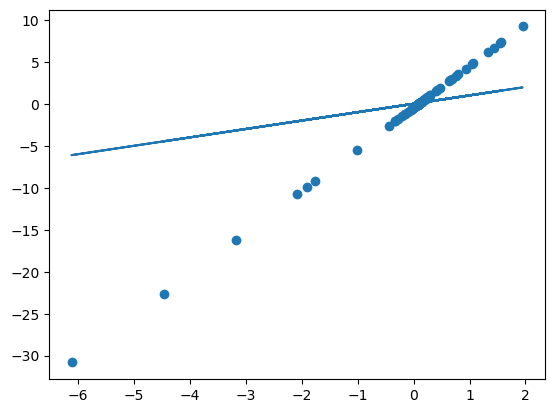

In [17]:
dataZ = (data2-np.mean(data2)) / np.std(data2)
dataMed = np.median(data2)
dataMAD = robust.mad(data2)
dataMz = stats.norm.ppf(.75)*(data2-dataMed) / dataMAD
plt.scatter(dataZ, dataMz)
plt.plot(dataZ, dataZ)

<AxesSubplot:>

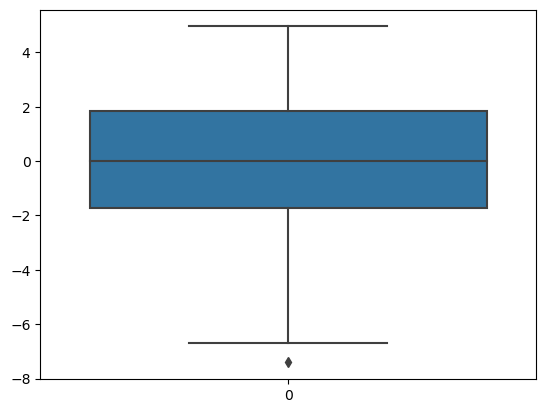

In [18]:
sns.boxplot(data=data4, orient='v')

In [19]:
plt.style.use(['science', 'notebook','grid'])

# 4. Z score stats.zscore(data,ddof=1)

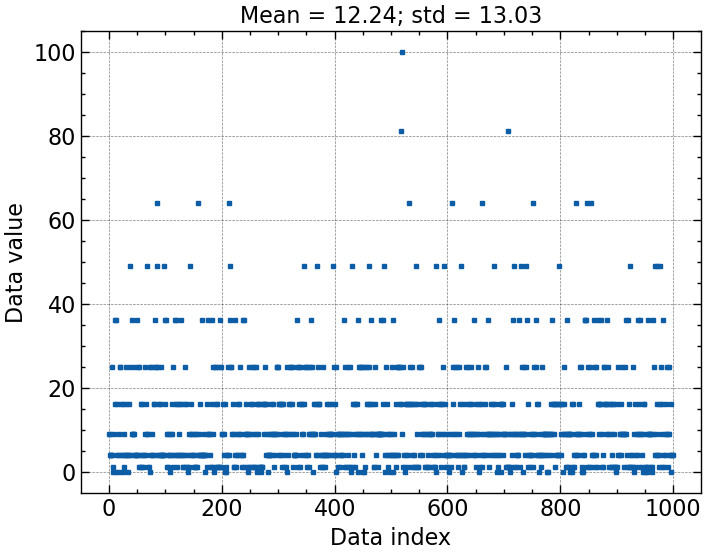

In [20]:
## create data
data = np.random.poisson(3,1000)**2

## compute the mean and std
datamean = np.mean(data)
datastd  = np.std(data,ddof=1)

# the previous two lines are equivalent to the following two lines
#datamean = data.mean()
#datastd  = data.std(ddof=1)



plt.plot(data,'s',markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f'Mean = {np.round(datamean,2)}; std = {np.round(datastd,2)}')

plt.show()

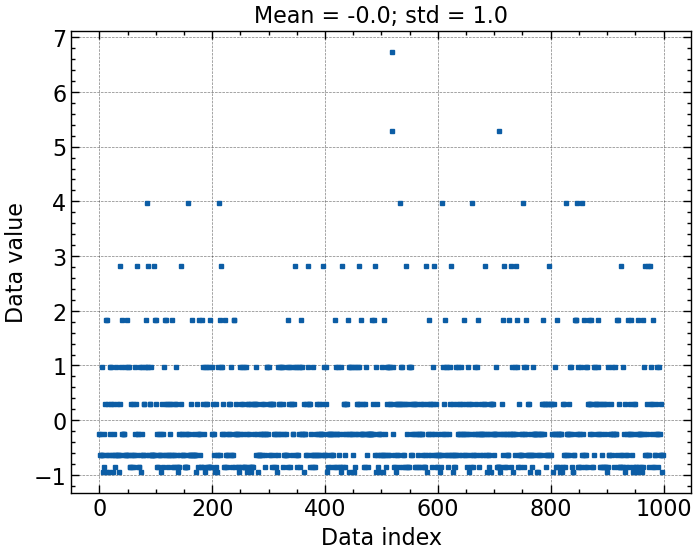

In [21]:
## now for z-scoring

# z-score is data minus mean divided by stdev
dataz = (data-datamean) / datastd

# can also use Python function
### NOTE the ddof=1 in the zscore function, to match std() below. That's incorrect in the video :(
dataz = stats.zscore(data,ddof=1)

# compute the mean and std
dataZmean = np.mean(dataz)
dataZstd  = np.std(dataz,ddof=1)

plt.plot(dataz,'s',markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f'Mean = {np.round(dataZmean,2)}; std = {np.round(dataZstd,2)}')

plt.show()

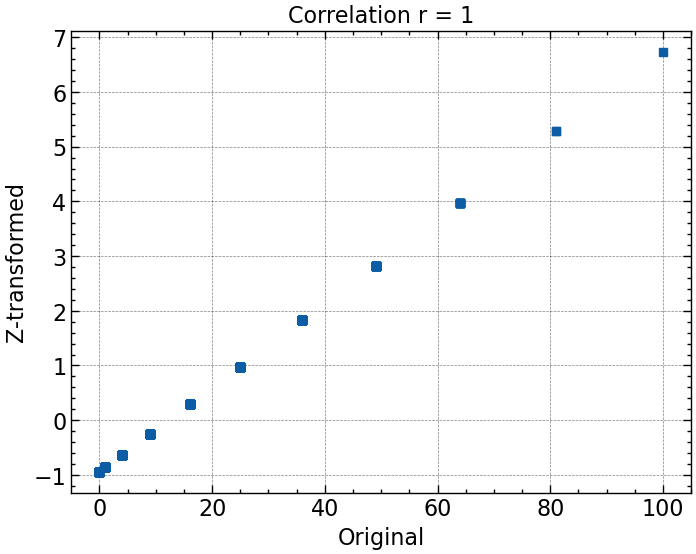

In [22]:
## show that the relative values are preserved

plt.plot(data,dataz,'s')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title('Correlation r = %g'%np.corrcoef(data,dataz)[0,0])
plt.show()

# 5.CDF's and PDF's

In [23]:
## example using log-normal distribution

# variable to evaluate the functions on
x = np.linspace(0,5,1001)

# note the function call pattern...
p1 = stats.lognorm.pdf(x,1)
c1 = stats.lognorm.cdf(x,1)

p2 = stats.lognorm.pdf(x,.1)
c2 = stats.lognorm.cdf(x,.1)

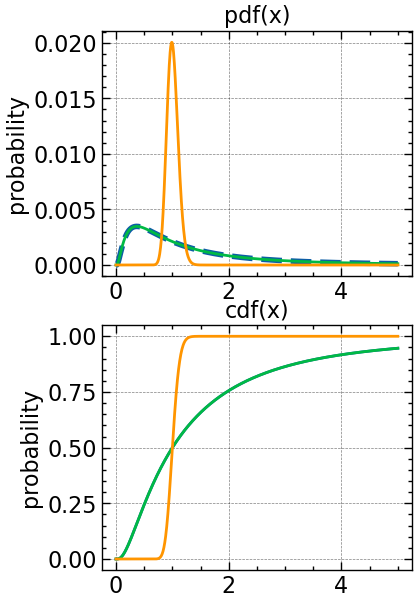

In [24]:
fig, ax=plt.subplots(2, 1, figsize=(4,7))
ax[0].plot(x,p1/sum(p1), ls='--', lw=4) # question: why divide by sum here? Normalize the data
ax[0].plot(x,p1/sum(p1), x,p2/sum(p2))
ax[0].set_ylabel('probability')
ax[0].set_title('pdf(x)')

# draw the cdfs
ax[1].plot(x,c1)
ax[1].plot(x,c1, x,c2)
ax[1].set_ylabel('probability')
ax[1].set_title('cdf(x)')
plt.show()

In [25]:
sum(p1/sum(p1))

0.9999999999999984

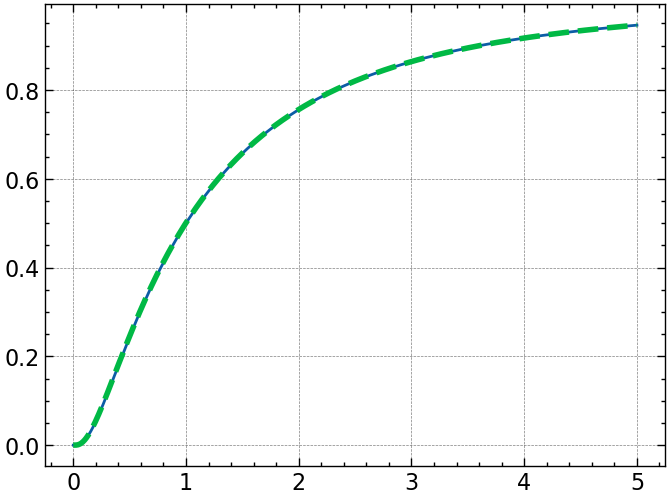

In [26]:
## computing the cdf from the pdf

# compute the cdf
c1x = np.cumsum( p1*(x[1]-x[0]) )

plt.plot(x,c1)
plt.plot(x,c1x,'--', lw=4)
plt.show()

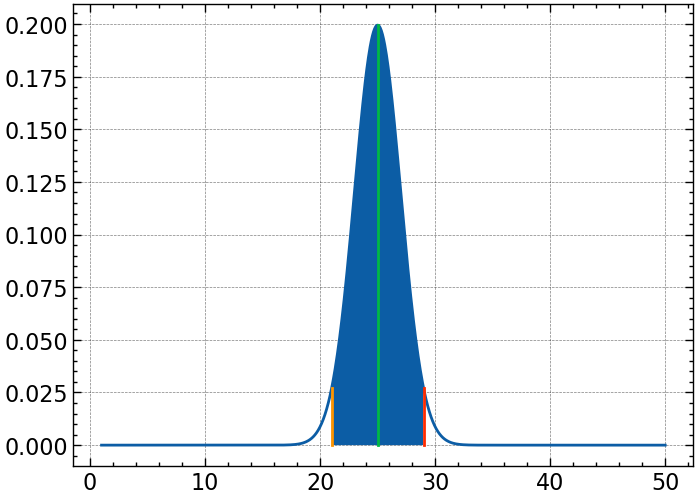

In [27]:
mean=25
std=2
x=np.linspace(1,50, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std ))
plt.plot([mean, mean], [0, np.max(stats.norm.pdf(x, mean, std ))])
plt.plot([mean-2*std, mean-2*std], [0, stats.norm.pdf(mean-2*std, mean, std)])
plt.plot([mean+2*std, mean+2*std], [0, stats.norm.pdf(mean+2*std, mean, std)])
plt.fill_between(x, stats.norm.pdf(x, mean, std ), 0, where=(x>mean-2*std)&(x<mean+2*std))

# 6.Central Limit Theorem 

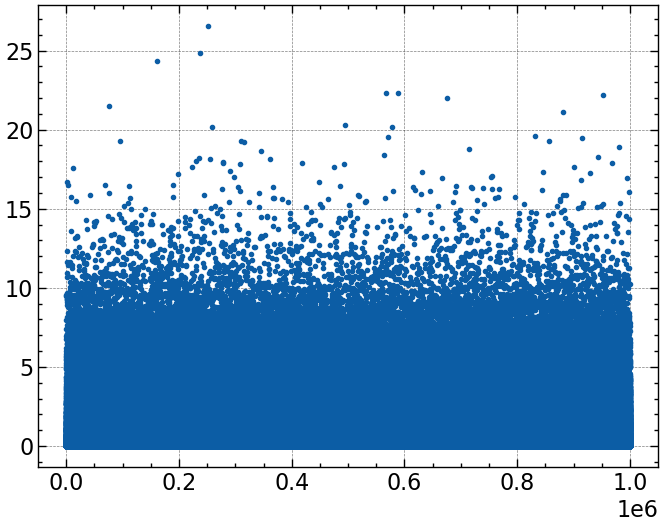

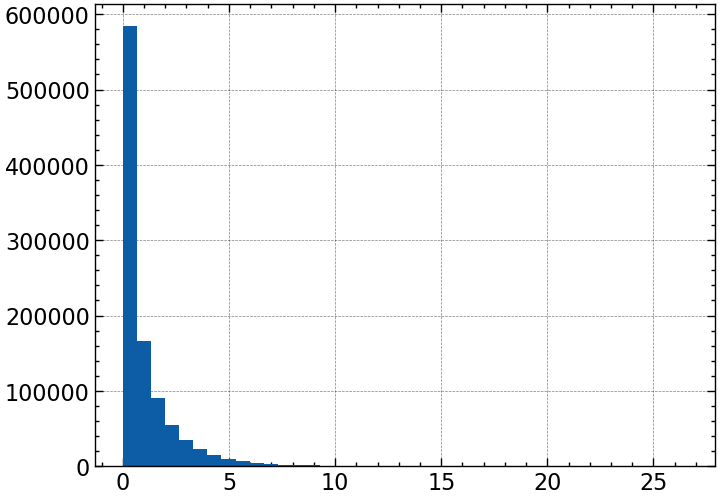

In [28]:
## create data from a power-law distribution

# data
N = 1000000
data = np.random.randn(N)**2
# alternative data
# data = np.sin(np.linspace(0,10*np.pi,N))

# show the distribution
plt.plot(data,'.')
plt.show()

plt.hist(data,40)
plt.show()

In [29]:
np.mean(data)

1.0008957543149877

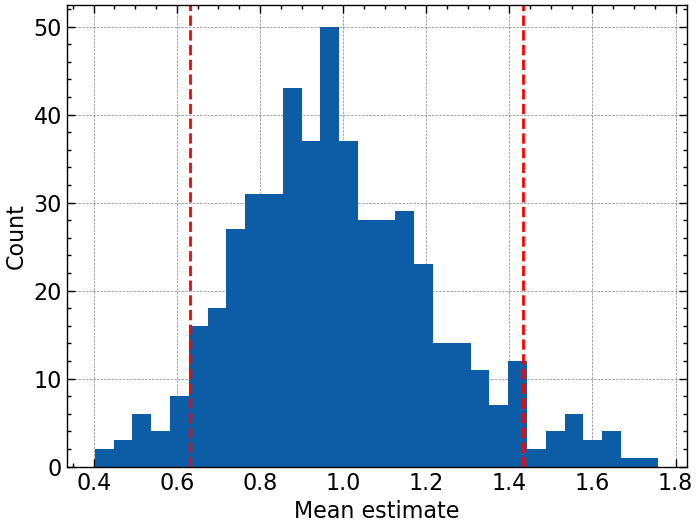

In [30]:
## repeated samples of the mean

samplesize   = 30
numberOfExps = 500
samplemeans  = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0,N,samplesize)
    samplemeans[expi] = np.mean(data[ sampleidx ])
    

# and show its distribution
plt.hist(samplemeans,30)
plt.xlabel('Mean estimate')
plt.ylabel('Count')
plt.axvline(np.percentile(samplemeans, 95), color='red', ls='--')
plt.axvline(np.percentile(samplemeans, 5), color='red', ls='--')
plt.show()

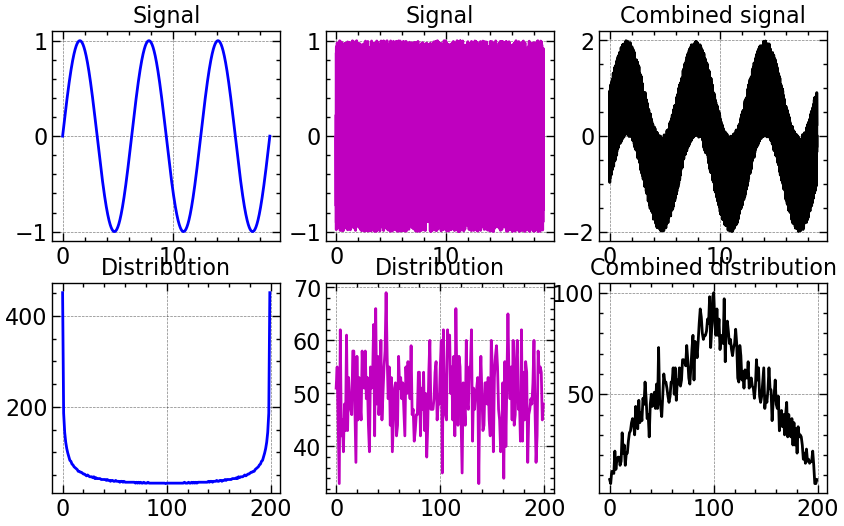

In [31]:
x = np.linspace(0,6*np.pi,10001)
s = np.sin(x)
u = 2*np.random.rand(len(x))-1

fig,ax = plt.subplots(2,3,figsize=(10,6))
ax[0,0].plot(x,s,'b')
ax[0,0].set_title('Signal')

y,xx = np.histogram(s,200)
ax[1,0].plot(y,'b')
ax[1,0].set_title('Distribution')

ax[0,1].plot(x,u,'m')
ax[0,1].set_title('Signal')

y,xx = np.histogram(u,200)
ax[1,1].plot(y,'m')
ax[1,1].set_title('Distribution')

ax[0,2].plot(x,s+u,'k')
ax[0,2].set_title('Combined signal')

y,xx = np.histogram(s+u,200)
ax[1,2].plot(y,'k')
ax[1,2].set_title('Combined distribution')

plt.show()

C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Kevin\AppData\Local\Temp\ipykernel_9460\2405286063.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating le

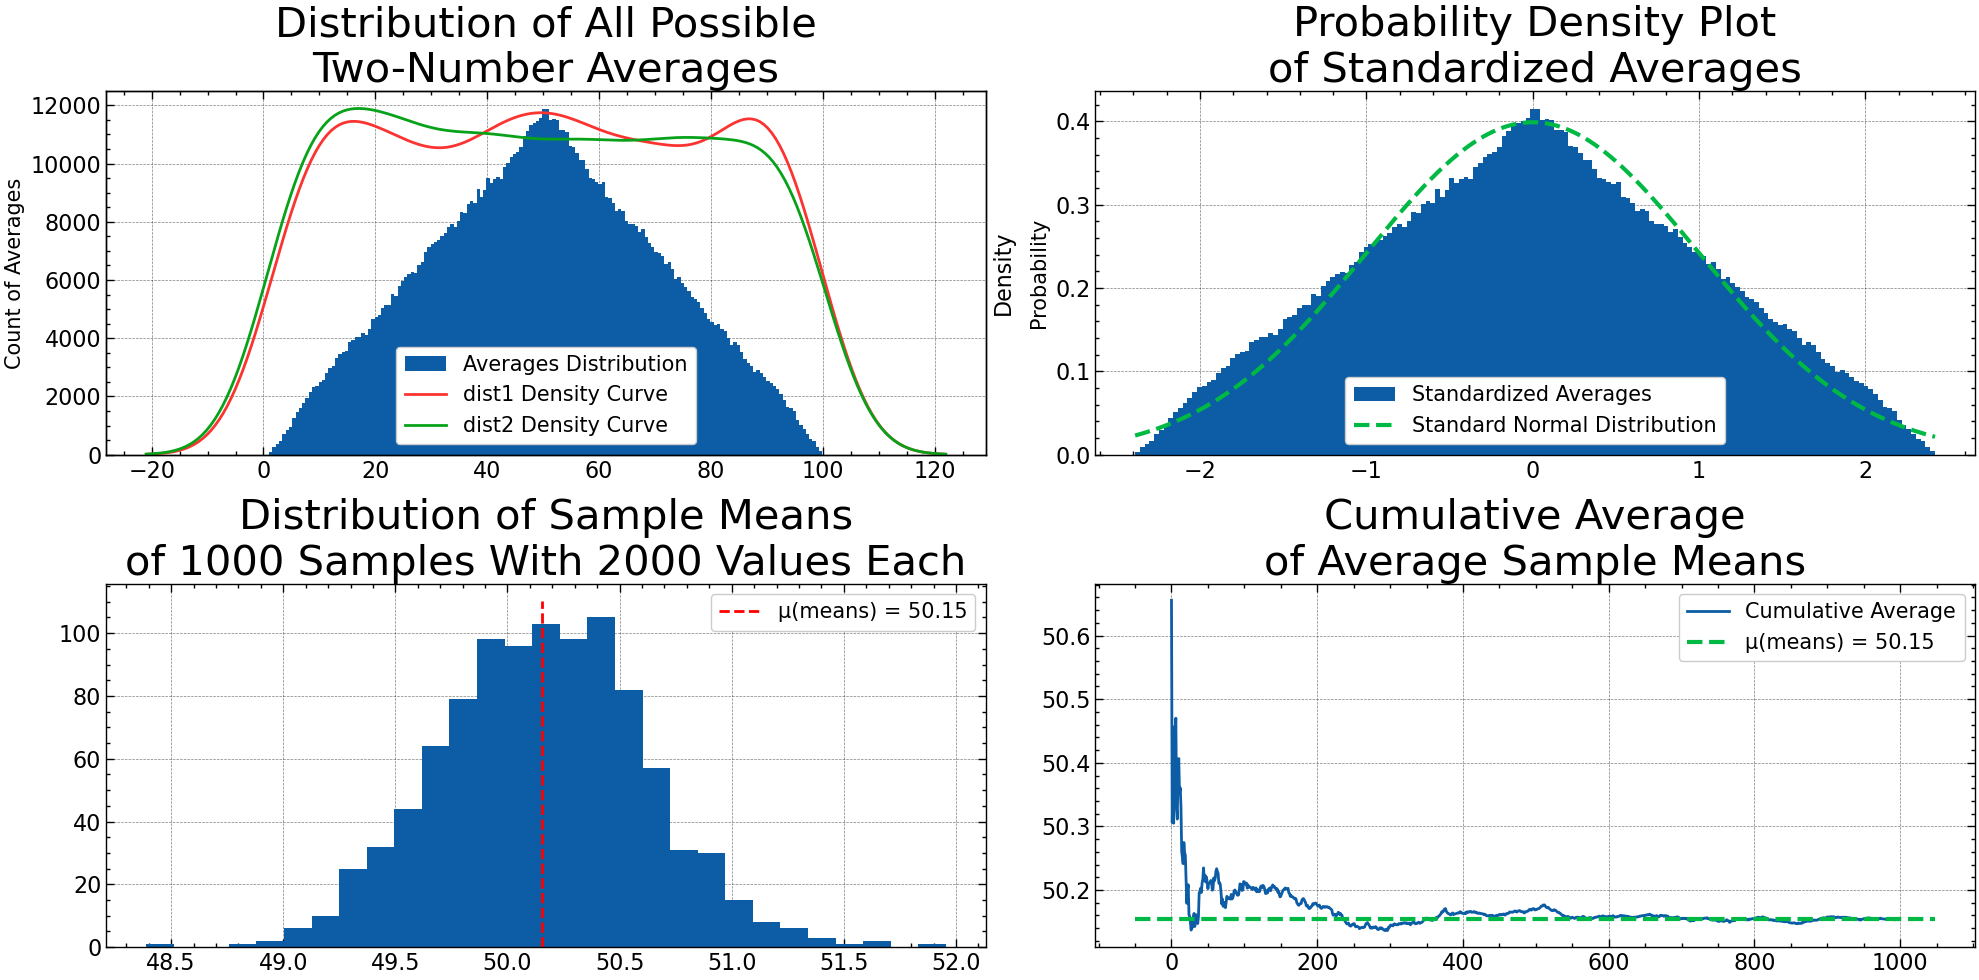

In [32]:
def plot_means(dist1, dist2, n_samples=200, sample_size=2000):
    averages = np.array([(val1+val2)/2 for val1 in dist1 for val2 in dist2])
    standardized_averages = (averages - np.mean(averages)) / np.std(averages) # ddof=0 since this would be considered a population?
    sample_means = np.array([np.mean(np.random.choice(a=averages, size=sample_size, replace=True)) for i in range(n_samples)])
    avg_sample_means = np.mean(sample_means)
    cum_average = np.array([np.mean(sample_means[:i]) for i in range(1,len(sample_means))])
 
    
    fig = plt.figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    ax1 = plt.subplot2grid((2,2),(0,0),colspan=1)
    ax1_1 = ax1.twinx()
    ax2 = plt.subplot2grid((2,2),(0,1),colspan=1)
    ax3 = plt.subplot2grid((2,2),(1,0),colspan=1)
    ax4 = plt.subplot2grid((2,2),(1,1),colspan=1)
 
    ax1.hist(averages, 'fd', label='Averages Distribution')
    sns.distplot(dist1, hist=False,ax=ax1_1, label='dist1 Density Curve', color='#FB3431')
    sns.distplot(dist2, hist=False,ax=ax1_1, label='dist2 Density Curve', color='#08A21A')
    ax1.set_ylabel('Count of Averages', fontsize=15)
    ax1_1.set_yticks([])
    ax1.set_title('Distribution of All Possible\nTwo-Number Averages', fontsize=30)
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_1.get_legend_handles_labels()
    ax1_1.legend(lines + lines2, labels + labels2, fontsize=15)
 
    
    ax2.hist(standardized_averages, 'fd', density=True, label='Standardized Averages')
    x = np.linspace(standardized_averages.min(), standardized_averages.max(), len(standardized_averages))
    ax2.plot(x, stats.norm.pdf(x), '--', linewidth=3, label='Standard Normal Distribution')
    ax2.set_title('Probability Density Plot\nof Standardized Averages', fontsize=30)
    ax2.set_ylabel('Probability', fontsize=15)
    ax2.legend(fontsize=15)
    
    ax3.hist(sample_means, 'fd')
    ax3.plot([avg_sample_means,avg_sample_means], ax3.get_ylim(), 'r--', label=f'μ(means) = {np.round(avg_sample_means,2)}')
    ax3.set_title(f'Distribution of Sample Means\nof {n_samples} Samples With {sample_size} Values Each', fontsize=30)
    ax3.legend(fontsize=15)
    
    ax4.plot(np.arange(len(cum_average)), cum_average, linewidth=2, label='Cumulative Average')
    ax4.plot(ax4.get_xlim(), [avg_sample_means,avg_sample_means], '--', linewidth=3, label=f'μ(means) = {np.round(avg_sample_means, 2)}')
    ax4.set_title('Cumulative Average\nof Average Sample Means', fontsize=30)
    ax4.legend(fontsize=15)
    
    fig.tight_layout()
    plt.show()
    
plot_means(np.random.uniform(1,100,1000), np.random.uniform(1,100,1000), n_samples=1000, sample_size=2000)

# 7. Compute Probability

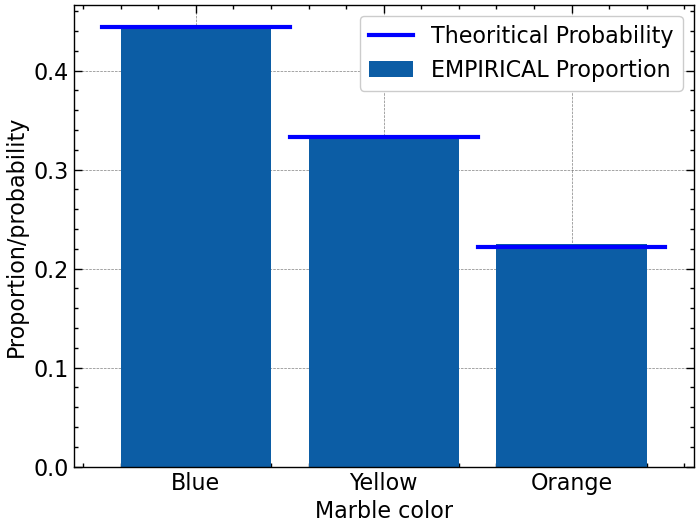

In [33]:
## the example of drawing marbles from a jar

# colored marble counts
blue   = 40
yellow = 30
orange = 20
totalMarbs = blue + yellow + orange

# put them all in a jar
jar = np.hstack((1*np.ones(blue),2*np.ones(yellow),3*np.ones(orange)))
#print(jar)
# now we draw 500 marbles (with replacement)
numDraws = 100000
drawColors = np.zeros(numDraws)

for drawi in range(numDraws):
    
    # generate a random integer to draw
    randmarble = int(np.random.rand()*len(jar))
    #print(randmarble)
    # store the color of that marble
    drawColors[drawi] = jar[randmarble]
    #print(drawColors)

# now we need to know the proportion of colors drawn
propBlue = sum(drawColors==1) / numDraws
propYell = sum(drawColors==2) / numDraws
propOran = sum(drawColors==3) / numDraws


# plot those against the theoretical probability
plt.bar([1,2,3],[ propBlue, propYell, propOran ],label='EMPIRICAL Proportion')
plt.plot([0.5, 1.5],[blue/totalMarbs, blue/totalMarbs],'b',linewidth=3,label='Theoritical Probability')
plt.plot([1.5, 2.5],[yellow/totalMarbs,yellow/totalMarbs],'b',linewidth=3)
plt.plot([2.5, 3.5],[orange/totalMarbs,orange/totalMarbs],'b',linewidth=3)

plt.xticks([1,2,3],labels=('Blue','Yellow','Orange'))
plt.xlabel('Marble color')
plt.ylabel('Proportion/probability')
plt.legend()
plt.show()

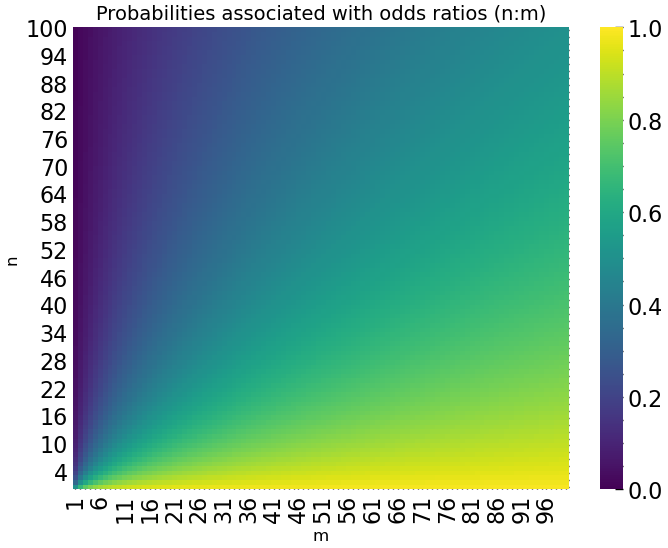

In [34]:
data=np.zeros((100,100))
df=pd.DataFrame(data)
df.columns=np.arange(1,101)
df.index=np.arange(1,101)
x=np.arange(1,101)
y=np.arange(1,101)
for i in range(1,101):
    for j in range(1,101):
        df[i][j]=1/(1+(x[j-1]/y[i-1]))
        
plt.title('Probabilities associated with odds ratios (n:m)', fontsize=14)
sns.heatmap(df.iloc[::-1], vmin=0, vmax=1,cmap='viridis')
plt.xlabel('m', fontsize=12)
plt.ylabel('n', fontsize=12)
plt.show()

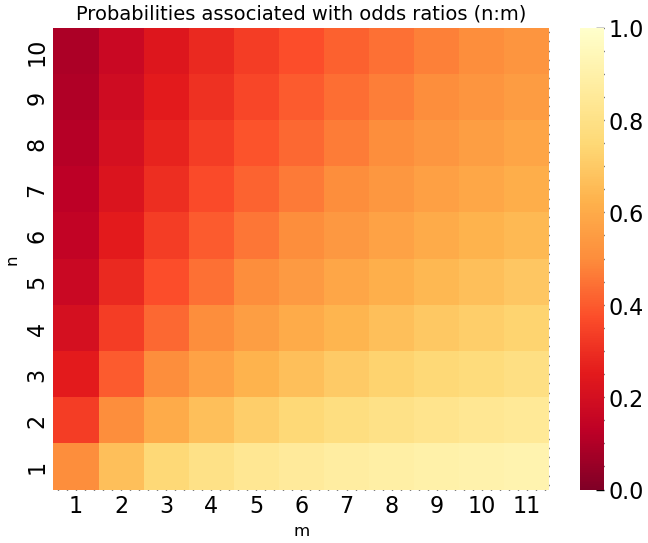

In [35]:
n = range(1, 11)
m = range(1, 12)
 
df = pd.DataFrame()
 
for mi in m:
    df[mi] = [1 / (ni/mi + 1) for ni in n][::-1]
 
df.index = n[::-1]
 
plt.figure(figsize=(8,6))
plt.title('Probabilities associated with odds ratios (n:m)', fontsize=14)
sns.heatmap(df, cmap='YlOrRd_r', vmin=0, vmax=1)
plt.xlabel('m', fontsize=12)
plt.ylabel('n', fontsize=12)
plt.show()

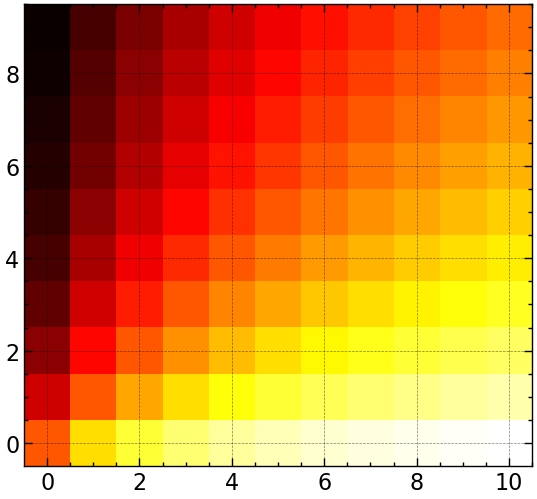

In [36]:
a=np.zeros([10,11])
M=[1,2,3,4,5,6,7,8,9,10]
N=[1,2,3,4,5,6,7,8,9,10,11]
for i,m in enumerate(M):
    for j,n in enumerate(N):
        a[i][j]=1/(1 + m/n)
plt.imshow(a, cmap='hot', origin='lower')
plt.show()

In [37]:
red=80
yellow=15
green=5
marbles=np.hstack([[1]*red,[2]*yellow, [3]*green])

In [38]:
fav=8
n_experiment=1000000
result=np.zeros(n_experiment)
for i in range(n_experiment):
    result[i]=np.random.permutation(marbles)[fav]

In [39]:
proprede = sum(result==1) / n_experiment
propyel = sum(result==2) / n_experiment
propgre = sum(result==3) / n_experiment

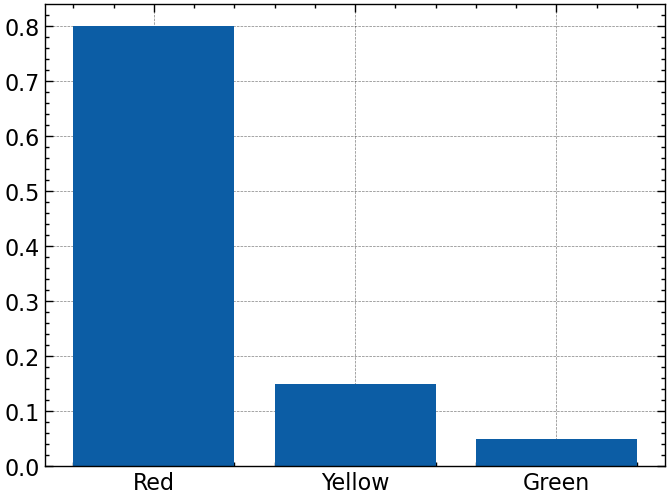

In [40]:
plt.bar([1,2,3],[ proprede, propyel, propgre ],label='EMPIRICAL Proportion')
plt.xticks([1,2,3],labels=('Red','Yellow','Green'))
plt.show()

# 8. Conditional

In [41]:
N = 1000
spikeDur  = 10  # a.u. but must be an even number
spikeNumA = .01 # in proportion of total number of points
spikeNumB = .05 # in proportion of total number of points

# initialize to zeros
spike_tsA = np.zeros(N)
spike_tsB = np.zeros(N)


### populate time series A
spiketimesA = np.random.randint(0,N,int(N*spikeNumA))# 10 spikes

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesA)):
    
    # find boundaries
    bnd_pre = int( max(0,spiketimesA[spikei]-spikeDur/2) )

    bnd_pst = int( min(N,spiketimesA[spikei]+spikeDur/2) )

    
    # fill in with ones
    spike_tsA[bnd_pre:bnd_pst] = 1



# ### repeat for time series 2
spiketimesB = np.random.randint(0,N,int(N*spikeNumB)) #50 spikes 
# spiketimesB[:len(spiketimesA)] = spiketimesA # induce strong conditional probability

# flesh out spikes (loop per spike)
for spikei in range(len(spiketimesB)):
    
    # find boundaries
    bnd_pre = int( max(0,spiketimesB[spikei]-spikeDur/2) )
    bnd_pst = int( min(N,spiketimesB[spikei]+spikeDur/2) )
    
    # fill in with ones
    spike_tsB[bnd_pre:bnd_pst] = 1

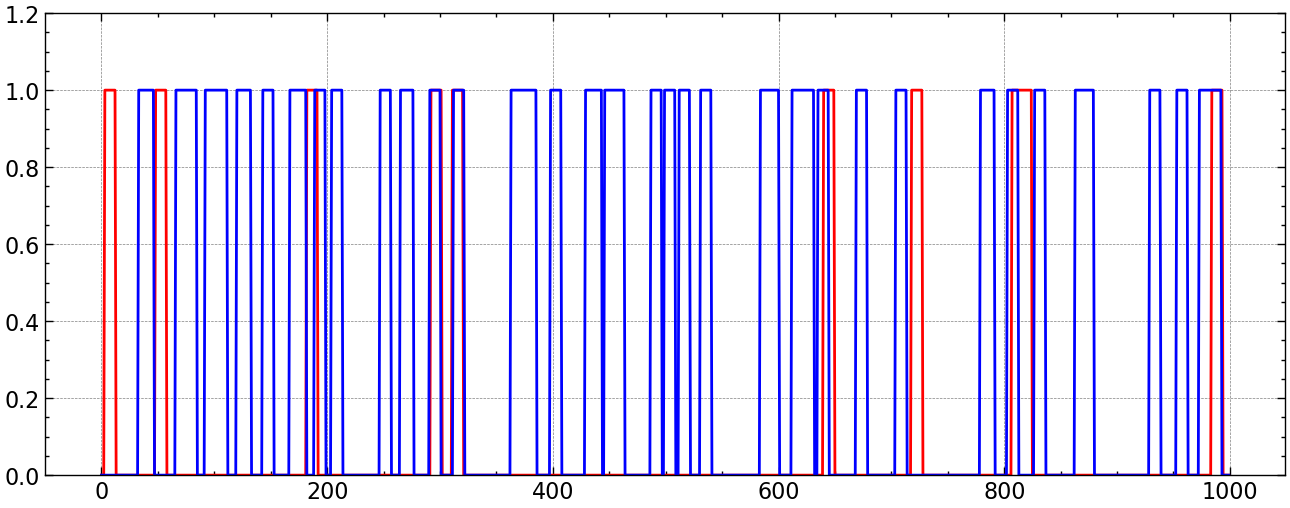

In [42]:
## let's see what they look like
plt.figure(figsize=(16,6))
plt.plot(range(N),spike_tsA, c='r')
plt.plot(range(N),spike_tsB, c='b')
plt.ylim([0,1.2])
# plt.xlim([2000,2500])
plt.show()

In [43]:
## compute their probabilities and intersection

# probabilities
probA = sum(spike_tsA==1) / N
probB = np.mean(spike_tsB) #sum()/N alias mean

# joint probability
probAB = np.mean(spike_tsA+spike_tsB==2)

print(probA,probB,probAB)

0.098 0.416 0.041


In [44]:
sum(spike_tsB==1)

416

In [45]:
## compute the conditional probabilities

# p(A|B)
pAgivenB = probAB/probB

# p(B|A)
pBgivenA = probAB/probA

# print a little report
print('P(A)   = %g'%probA)
print('P(A|B) = %g'%pAgivenB)
print('P(B)   = %g'%probB)
print('P(B|A) = %g'%pBgivenA)

P(A)   = 0.098
P(A|B) = 0.0985577
P(B)   = 0.416
P(B|A) = 0.418367


In [46]:
probA+probB+pAgivenB+pBgivenA

1.0309250392464677

# 9. Law of Large Number

In [47]:
## example with rolling a die

# die probabilities (weighted)
f1 = 2/8
f2 = 2/8
f3 = 1/8
f4 = 1/8
f5 = 1/8
f6 = 1/8

# confirm sum to 1
print(f1+f2+f3+f4+f5+f6)

# expected value
expval = 1*f1 + 2*f2 + 3*f3 + 4*f4 + 5*f5 + 6*f6

# generate "population"
population = [ 1, 1, 2, 2, 3, 4, 5, 6 ]
for i in range(2):
    population = np.hstack((population, population))

nPop = len(population)

# draw sample of 8 rolls
sample = np.random.choice(population,8)

1.0


In [48]:
nPop #(8+8  +  8+8)

32

In [49]:
sample

array([2, 2, 3, 2, 1, 2, 3, 1])

In [50]:
expval

3.0

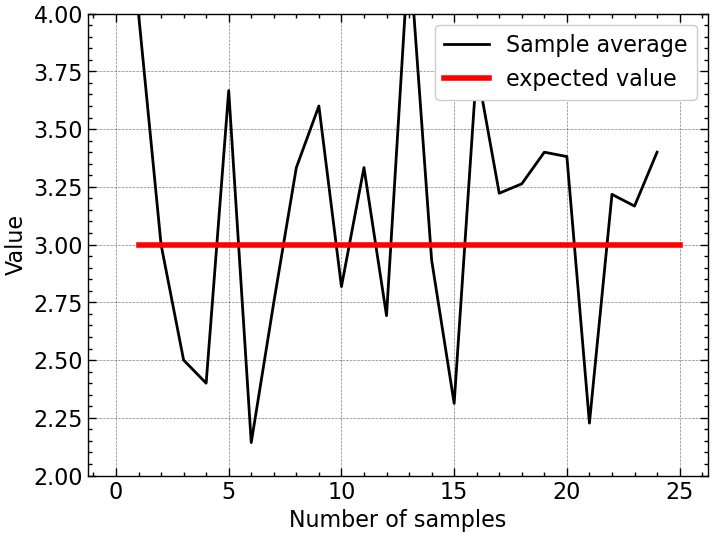

In [51]:
## experiment: draw larger and larger samples

k = 25 # maximum number of samples
sampleAve = np.zeros(k)

for i in range(k):
    idx = np.floor(np.random.rand(i+1)*nPop)
    sampleAve[i] = np.mean( population[idx.astype(int)] )
    #print(sampleAve)


plt.plot(sampleAve,'k')
plt.plot([1,k],[expval,expval],'r',linewidth=4)
plt.xlabel('Number of samples')
plt.ylabel('Value')
plt.ylim([expval-1, expval+1])
plt.legend(('Sample average','expected value'))

# mean of samples converges to population estimate quickly:
#print( np.mean(sampleAve) )
#print( np.mean(sampleAve[:9]) )

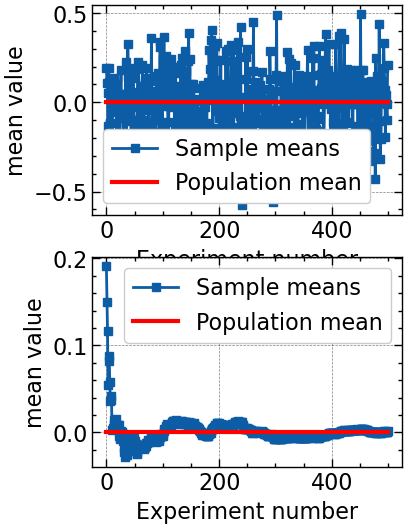

In [52]:
## Another example from a previous lecture (sampleVariability) (slightly adapted)

# generate population data with known mean
populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)  # demean


# get means of samples
samplesize   = 30
numberOfExps = 500
samplemeans  = np.zeros(numberOfExps)

for expi in range(numberOfExps):
    # get a sample and compute its mean
    sampleidx = np.random.randint(0,populationN,samplesize)
    samplemeans[expi] = np.mean(population[ sampleidx ])


# show the results!
fig,ax = plt.subplots(2,1,figsize=(4,6))
ax[0].plot(samplemeans,'s-')
ax[0].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[0].set_xlabel('Experiment number')
ax[0].set_ylabel('mean value')
ax[0].legend(('Sample means','Population mean'))

ax[1].plot(np.cumsum(samplemeans) / np.arange(1,numberOfExps+1),'s-')
ax[1].plot([0,numberOfExps],[np.mean(population),np.mean(population)],'r',linewidth=3)
ax[1].set_xlabel('Experiment number')
ax[1].set_ylabel('mean value')
ax[1].legend(('Sample means','Population mean'))



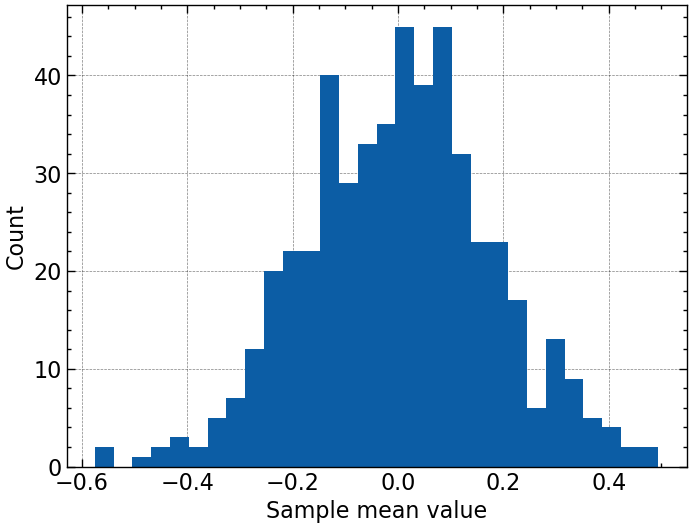

In [53]:
## some foreshadowing...

plt.hist(samplemeans,30)
plt.xlabel('Sample mean value')
plt.ylabel('Count')
plt.show()

In [54]:
dice=np.array([1,1,1,1,1,2,2,3,4,5,6,6,6,6])
dice=np.hstack([dice, dice, dice, dice])
prob=np.zeros((2, len(np.unique(dice))))
for idx,die in enumerate(np.unique(dice)):
    prob[:, idx] = [die,sum(dice==die)/len(dice) ]
df=pd.DataFrame(prob).T
df.columns=['die', 'prob']
df

,die,prob
0,1.0,0.357143
1,2.0,0.142857
2,3.0,0.071429
3,4.0,0.071429
4,5.0,0.071429
5,6.0,0.285714


In [55]:
expv=sum(df['die']*df['prob'])
expv

3.2142857142857144

In [56]:
len(dice)

56

In [57]:
result=[np.mean([ np.mean(np.random.choice(dice, 14)) for i in range(num_sample+1)]) for num_sample in range (200)]

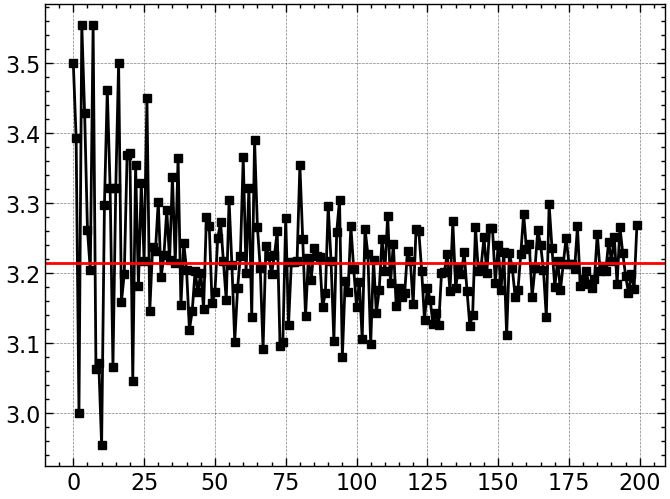

In [58]:
plt.plot(result, 'ks-')
plt.axhline(expv, color='red')

# 10. Probability Mass Function

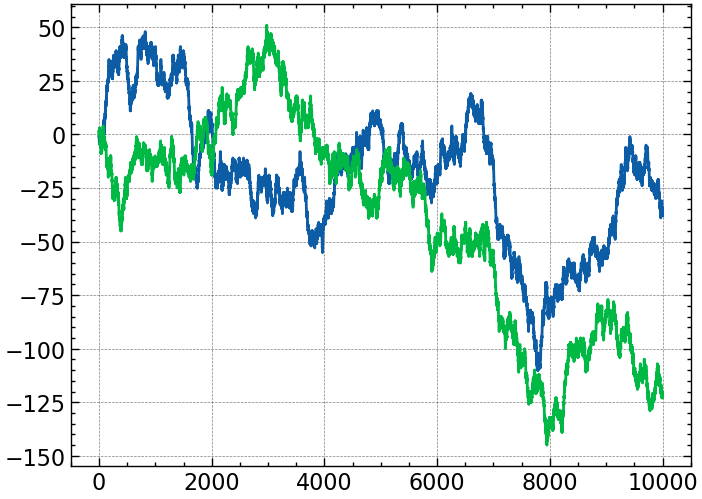

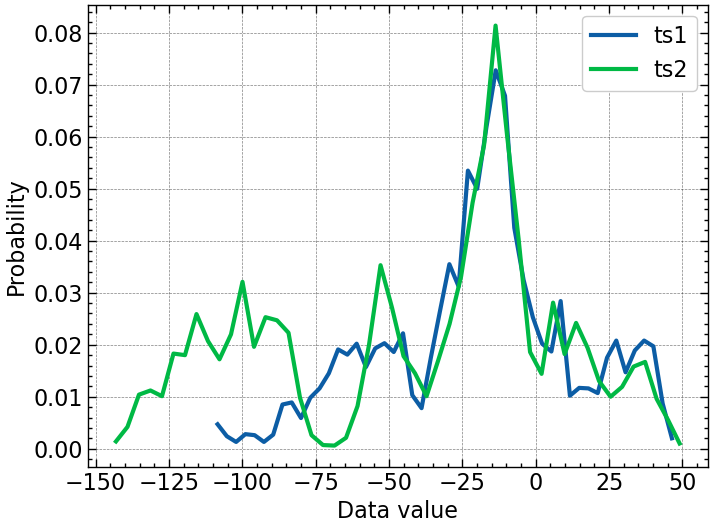

In [59]:
## compute empirical probability function

# continous signal (technically discrete!)
N = 10004
datats1 = np.cumsum(np.sign(np.random.randn(N)))
datats2 = np.cumsum(np.sign(np.random.randn(N)))

# let's see what they look like
plt.plot(np.arange(N),datats1,linewidth=2)
plt.plot(np.arange(N),datats2,linewidth=2)
plt.show()


# discretize using histograms
nbins = 50

y,x = np.histogram(datats1,nbins)
x1 = (x[1:]+x[:-1])/2
y1 = y/sum(y)

y,x = np.histogram(datats2,nbins)
x2 = (x[1:]+x[:-1])/2
y2 = y/sum(y)


plt.plot(x1,y1, x2,y2,linewidth=3)
plt.legend(('ts1','ts2'))
plt.xlabel('Data value')
plt.ylabel('Probability')
plt.show()

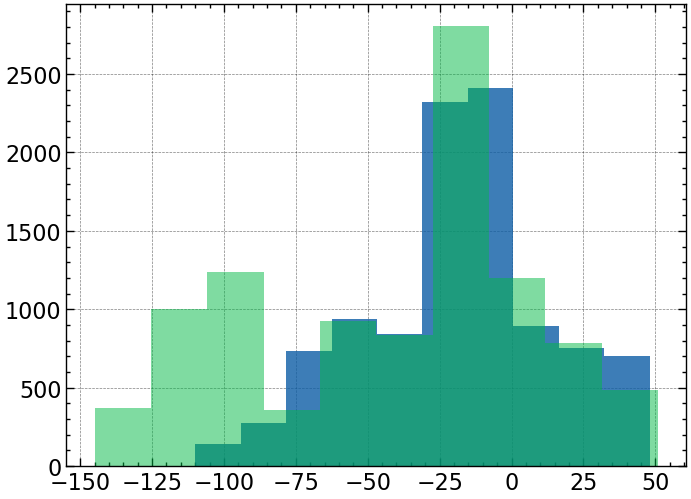

In [60]:
plt.hist(datats1, alpha=0.8)
plt.hist(datats2, alpha=0.5)
plt.show()

# 11. Sampling variability

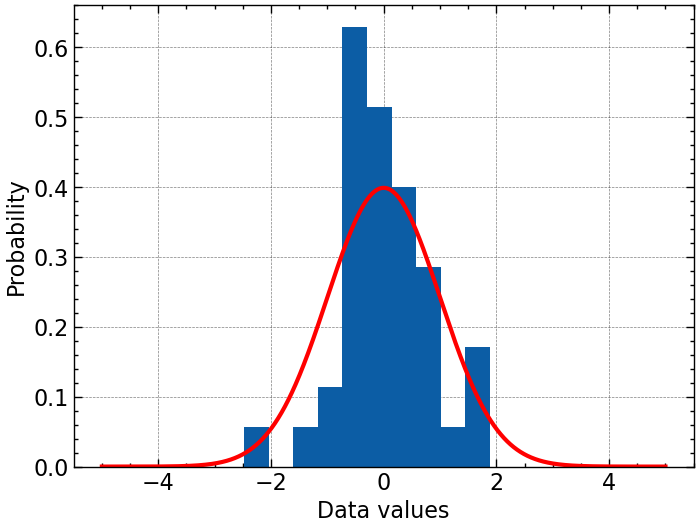

In [61]:
## a theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)
# (normalize to pdf)
# theoNormDist = theoNormDist*np.mean(np.diff(x))

# now for our experiment
numSamples = 40

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
for expi in range(numSamples):
    sampledata[expi] = np.random.randn()


# show the results
plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

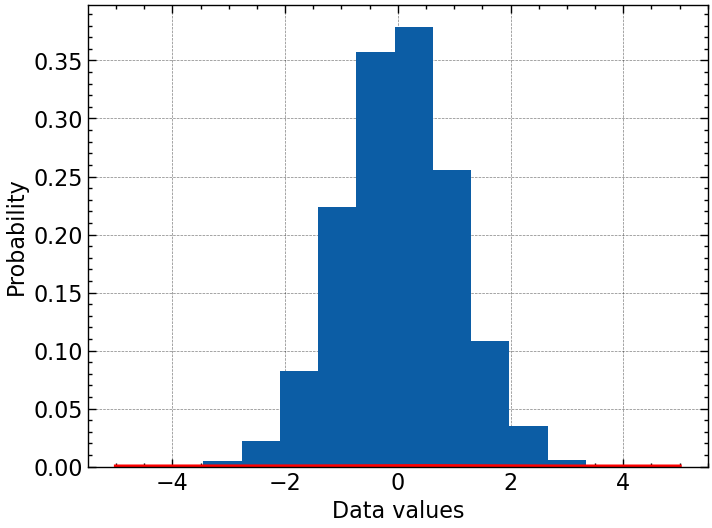

In [62]:
## a theoretical normal distribution
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)
# (normalize to pdf)
theoNormDist = theoNormDist*np.mean(np.diff(x))

# now for our experiment
numSamples = 4000

# initialize
sampledata = np.zeros(numSamples)

# run the experiment!
for expi in range(numSamples):
    sampledata[expi] = np.random.randn()


# show the results
plt.hist(sampledata,density=True)
plt.plot(x,theoNormDist,'r',linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

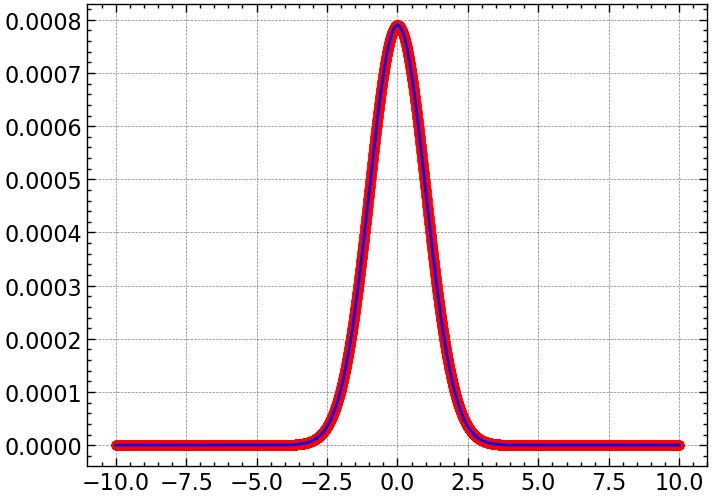

0.99999999999955
0.9999999999999963


In [63]:
x = np.linspace(-10,10,10101)
theoNormDist = stats.norm.pdf(x)
 
theoNormDist1 = theoNormDist*(x[1]-x[0]) #Calculus Approach
theoNormDist2 = theoNormDist/sum(theoNormDist) #Empirical approach
 
plt.plot(x,theoNormDist1, 'ro')
plt.plot(x,theoNormDist2, 'b', linewidth=2)
plt.show()
print(sum(theoNormDist1))
print(sum(theoNormDist2))

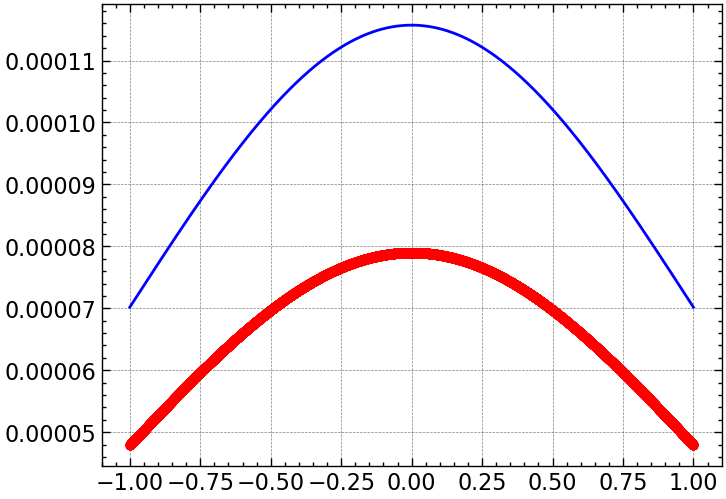

0.6827374055506844
1.0000000000000009


In [64]:
x = np.linspace(-1,1,10101)
theoNormDist = stats.norm.pdf(x)
 
theoNormDist1 = theoNormDist*(x[1]-x[0])
theoNormDist2 = theoNormDist/sum(theoNormDist)
 
plt.plot(x,theoNormDist1, 'ro')
plt.plot(x,theoNormDist2, 'b', linewidth=2)
plt.show()
print(sum(theoNormDist1))
print(sum(theoNormDist2))

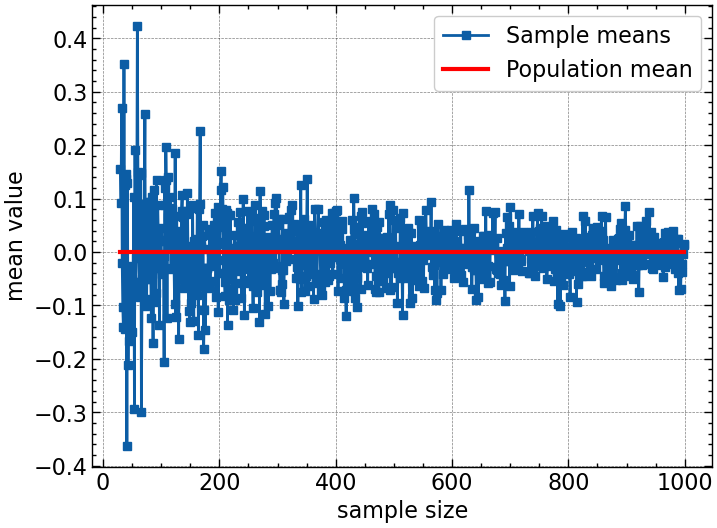

In [65]:
## repeat for different sample sizes

samplesizes = np.arange(30,1000)

samplemeans = np.zeros(len(samplesizes))

for sampi in range(len(samplesizes)):
    
    # nearly the same code as above
    sampleidx = np.random.randint(0,populationN,samplesizes[sampi])
    samplemeans[sampi] = np.mean(population[ sampleidx ])


# show the results!
plt.plot(samplesizes,samplemeans,'s-')
plt.plot(samplesizes[[0,-1]],[np.mean(population),np.mean(population)],'r',linewidth=3)
plt.xlabel('sample size')
plt.ylabel('mean value')
plt.legend(('Sample means','Population mean'))
plt.show()